In [69]:
import pandas as pd
import statsmodels.api as sm

In [70]:
data = pd.read_csv("economics_sharing.csv")
data

,ID,Do you use sharing economy platforms and services,Which ones?,How often do you used them,How old are you?,Your gender,Are you employed?,"All things considered, I find participating in collaborative consumption to be a wise move.","All things considered, I think participating in collaborative consumption is a good thing.","Overall, sharing goods and services within a collaborative consumption community makes sense.",...,I think collaborative consumption is fun.,I think collaborative consumption is pleasant,Contributing to my collaborative consumption community improves my image within the community,I gain recognition from contributing to my collaborative consumption community.,I would earn respect from others by sharing with other people in my collaborative consumption,People in the community who contribute have more prestige than those who do not,I can save money if I participate in collaborative consumption.,My participation in collaborative consumption benefits me financially,My participation in collaborative consumption can improve my economic situation,My participation in collaborative consumption saves me time
0,1,no,cloud services,several times a week,36-45,M,employed,5,5,4,...,6,2,7,3,6,2,2,6,3,3
1,2,yes,"bike-sharing, couud services, house-sharing",several times a week,36-45,F,employed,6,6,6,...,4,4,2,2,2,2,6,6,5,5
2,3,yes,"bike-sharing, couud services",several times a week,over 60,F,employed,7,7,5,...,5,5,6,5,2,4,7,7,5,2
3,4,yes,house-sharing/renting,several times a week,46-60,M,employed,7,4,5,...,6,5,7,3,3,6,2,6,6,6
4,5,no,house-sharing/renting,tried once or twice,36-45,F,employed,4,5,5,...,2,2,3,4,4,1,5,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,180,no,none of the above,tried once or twice,26-35,M,entrepreneur,3,6,2,...,2,6,2,5,4,5,5,5,3,5
180,181,no,none of the above,tried once or twice,46-60,F,employed,4,5,4,...,6,6,5,5,5,4,5,4,5,5
181,182,yes,cloud services,several times a month,36-45,F,employed,5,6,5,...,5,5,4,4,4,4,5,5,5,6
182,183,no,bike-sharing,once a year,18-25,M,employed,3,4,3,...,5,4,4,4,2,6,3,4,5,5


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 31 columns):
 #   Column                                                                                                  Non-Null Count  Dtype 
---  ------                                                                                                  --------------  ----- 
 0   ID                                                                                                      184 non-null    int64 
 1   Do you use sharing economy platforms and services                                                       184 non-null    object
 2   Which ones?                                                                                             184 non-null    object
 3   How often do you used them                                                                              184 non-null    object
 4   How old are you?                                                                                  

In [72]:
import pandas as pd

# Assuming your dataset is stored in a DataFrame called 'data'
# Replace 'your_dataset.csv' with the actual file or DataFrame name

# Example loading from CSV
# data = pd.read_csv('your_dataset.csv')

# Define a mapping of new column names
column_mapping = {
    'Do you use sharing economy platforms and services': 'use_platforms',
    'Which ones?': 'platforms_used',
    'How often do you used them': 'frequency',
    'How old are you?': 'age',
    'Your gender': 'gender',
    'Are you employed?': 'employed',
    'All things considered, I find participating in collaborative consumption to be a wise move. ': 'wise_move',
    'All things considered, I think participating in collaborative consumption is a good thing. ': 'good_thing',
    'Overall, sharing goods and services within a collaborative consumption community makes sense.': 'makes_sense',
    'Collaborative consumption is a better mode of consumption than selling and buying': 'better_buy_sell',
    ' All things considered, I expect to continue collaborative consumption often in the future. ': 'future_expectation',
    'I can see myself engaging in collaborative consumption more frequently in the future. ': 'future_engagement',
    'It is likely that I will frequently participate in collaborative consumption communities in the future': 'likely_participation',
    'Collaborative consumption helps save natural resources. ': 'saves_resources',
    'Collaborative consumption is a sustainable mode of consumption. ': 'sustainable_consumption',
    'Collaborative consumption is ecological': 'ecological',
    'Collaborative consumption is efficient in terms of using energy': 'energy_efficient',
    'Collaborative consumption is environmentally friendly. ': 'environment_friendly',
    'I think collaborative consumption is enjoyable. ': 'enjoyable',
    'I think collaborative consumption is interesting. ': 'interesting',
    'I think collaborative consumption is fun. ': 'fun',
    'I think collaborative consumption is pleasant': 'pleasant',
    'Contributing to my collaborative consumption community improves my image within the community': 'improves_image',
    'I gain recognition from contributing to my collaborative consumption community. ': 'gain_recognition',
    'I would earn respect from others by sharing with other people in my collaborative consumption': 'earn_respect',
    'People in the community who contribute have more prestige than those who do not': 'prestige_contributors',
    'I can save money if I participate in collaborative consumption. ': 'save_money',
    'My participation in collaborative consumption benefits me financially': 'financial_benefit',
    'My participation in collaborative consumption can improve my economic situation': 'economic_improvement',
    'My participation in collaborative consumption saves me time': 'saves_time'
}

# Rename columns
data.rename(columns=column_mapping, inplace=True)

# Save the modified DataFrame or use it as needed
# data.to_csv('your_modified_dataset.csv', index=False)


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       184 non-null    int64 
 1   use_platforms            184 non-null    object
 2   platforms_used           184 non-null    object
 3   frequency                184 non-null    object
 4   age                      184 non-null    object
 5   gender                   184 non-null    object
 6   employed                 184 non-null    object
 7   wise_move                184 non-null    int64 
 8   good_thing               184 non-null    int64 
 9   makes_sense              184 non-null    int64 
 10  better_buy_sell          184 non-null    int64 
 11  future_expectation       184 non-null    int64 
 12  future_engagement        184 non-null    int64 
 13  likely_participation     184 non-null    int64 
 14  saves_resources          184 non-null    i

In [74]:
attributes = data.iloc[:, 7:32]
attributes

,wise_move,good_thing,makes_sense,better_buy_sell,future_expectation,future_engagement,likely_participation,saves_resources,sustainable_consumption,ecological,...,fun,pleasant,improves_image,gain_recognition,earn_respect,prestige_contributors,save_money,financial_benefit,economic_improvement,saves_time
0,5,5,4,4,4,6,6,6,5,4,...,6,2,7,3,6,2,2,6,3,3
1,6,6,6,4,5,5,6,6,4,6,...,4,4,2,2,2,2,6,6,5,5
2,7,7,5,5,7,7,7,7,7,6,...,5,5,6,5,2,4,7,7,5,2
3,7,4,5,6,6,6,4,3,6,2,...,6,5,7,3,3,6,2,6,6,6
4,4,5,5,2,4,3,5,5,4,4,...,2,2,3,4,4,1,5,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,3,6,2,6,3,4,4,2,4,4,...,2,6,2,5,4,5,5,5,3,5
180,4,5,4,4,4,4,5,5,4,5,...,6,6,5,5,5,4,5,4,5,5
181,5,6,5,6,5,5,6,6,5,6,...,5,5,4,4,4,4,5,5,5,6
182,3,4,3,4,3,4,4,4,4,5,...,5,4,4,4,2,6,3,4,5,5


In [75]:
# Evaluate the data
# Bartlett's Test of Sphericity (we want p < 0.05 to go ahead)
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(data.iloc[:, 7:32])
print(f"Bartlett's Test of Sphericity p-value: {p_value}")

# KMO-test (we want overall MSA > 0.6 to go ahead)
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model = calculate_kmo(data.iloc[:, 7:32])
print(f"KMO-test overall MSA: {kmo_model}")

Bartlett's Test of Sphericity p-value: 0.0
KMO-test overall MSA: 0.9198899389419644


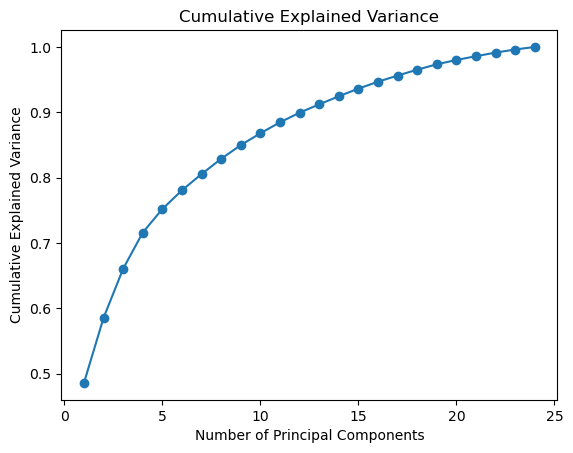

array([11.72240897,  2.4044719 ,  1.81335552,  1.33526797,  0.86917734,
        0.69284429,  0.59885926,  0.56364012,  0.50497416,  0.43716108,
        0.40494147,  0.35613098,  0.30708971,  0.29800755,  0.28326497,
        0.25444045,  0.22795884,  0.21695913,  0.19818498,  0.1605072 ,
        0.13871788,  0.13392472,  0.11359736,  0.09526169])

In [76]:
# Determine the number of factors
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Standardize the features (important for PCA)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.iloc[:, 7:32])

# Create and fit the PCA model
pca = PCA()
pca.fit(scaled_data)

# Get the explained variance ratios
explained_variance_ratios = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_explained_variance = explained_variance_ratios.cumsum()

# Plot the explained variance ratios, want the factors to explain 
# very roughly 70% or more of the variance
plt.plot(range(1, len(explained_variance_ratios) + 1), \
         cumulative_explained_variance, marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

pca.explained_variance_ # eigenvalues; want values > 1

Based on these, we can conclude there are four factors in the dataset and that these four factors explain
~70% of the variance.

In [77]:
# Extract the factor solution (with varimax rotation)
from factor_analyzer import Rotator
from sklearn.decomposition import FactorAnalysis

rotator = Rotator()

fa = FactorAnalysis(n_components=4)
fa.fit(data.iloc[:, 7:32])
rotated_loading = rotator.fit_transform(fa.components_.T)

print("Rotated Factor Loadings:")
pd.DataFrame(rotated_loading, index=data.columns[7:32])

Rotated Factor Loadings:


,0,1,2,3
wise_move,-0.928403,-0.210532,0.590036,-0.267854
good_thing,-0.828973,-0.126011,0.439932,-0.251461
makes_sense,-1.109323,-0.232541,0.315768,-0.306397
better_buy_sell,-0.724895,-0.727414,0.435430,-0.130236
future_expectation,-1.321523,-0.215782,0.160889,-0.454411
future_engagement,-1.184261,-0.564052,0.243610,-0.147559
likely_participation,-1.103812,-0.392841,0.175660,-0.380859
saves_resources,-0.393649,-0.420354,1.173878,-0.142774
sustainable_consumption,-0.831534,-0.550467,0.751177,-0.093014
ecological,-0.378190,-0.420600,1.227098,-0.391166


In [78]:
factor_scores = fa.transform(data.iloc[:, 7:32])
data['Anti-Practical'] = factor_scores[:,0]
data['Anti-Social_enjoyment'] = factor_scores[:,1]
data['Eco-friendly'] = factor_scores[:,2]
data['Anti-budget_friendly'] = factor_scores[:,3]

data

,ID,use_platforms,platforms_used,frequency,age,gender,employed,wise_move,good_thing,makes_sense,...,earn_respect,prestige_contributors,save_money,financial_benefit,economic_improvement,saves_time,Anti-Practical,Anti-Social_enjoyment,Eco-friendly,Anti-budget_friendly
0,1,no,cloud services,several times a week,36-45,M,employed,5,5,4,...,6,2,2,6,3,3,-0.019884,-0.698266,0.450857,1.420247
1,2,yes,"bike-sharing, couud services, house-sharing",several times a week,36-45,F,employed,6,6,6,...,2,2,6,6,5,5,0.028082,1.623759,0.349209,0.164927
2,3,yes,"bike-sharing, couud services",several times a week,over 60,F,employed,7,7,5,...,2,4,7,7,5,2,-0.905154,0.728478,-0.504136,0.486597
3,4,yes,house-sharing/renting,several times a week,46-60,M,employed,7,4,5,...,3,6,2,6,6,6,-0.167523,-0.531065,-0.707709,0.697259
4,5,no,house-sharing/renting,tried once or twice,36-45,F,employed,4,5,5,...,4,1,5,4,4,5,0.611044,-0.256697,0.207123,0.018974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,180,no,none of the above,tried once or twice,26-35,M,entrepreneur,3,6,2,...,4,5,5,5,3,5,0.494286,-1.497456,-0.056196,-0.820841
180,181,no,none of the above,tried once or twice,46-60,F,employed,4,5,4,...,5,4,5,4,5,5,-0.218051,-1.356990,0.229934,-0.254151
181,182,yes,cloud services,several times a month,36-45,F,employed,5,6,5,...,4,4,5,5,5,6,-0.509306,-0.103194,0.192717,0.499670
182,183,no,bike-sharing,once a year,18-25,M,employed,3,4,3,...,2,6,3,4,5,5,0.508466,-1.089291,0.619302,0.326901


In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       184 non-null    int64  
 1   use_platforms            184 non-null    object 
 2   platforms_used           184 non-null    object 
 3   frequency                184 non-null    object 
 4   age                      184 non-null    object 
 5   gender                   184 non-null    object 
 6   employed                 184 non-null    object 
 7   wise_move                184 non-null    int64  
 8   good_thing               184 non-null    int64  
 9   makes_sense              184 non-null    int64  
 10  better_buy_sell          184 non-null    int64  
 11  future_expectation       184 non-null    int64  
 12  future_engagement        184 non-null    int64  
 13  likely_participation     184 non-null    int64  
 14  saves_resources          1

In [ ]:
#additional cluster analysis

C:\Users\HP\AppData\Local\Temp\ipykernel_16200\1097064850.py:8: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  hc = linkage(dissimilarity_matrix, method="ward")


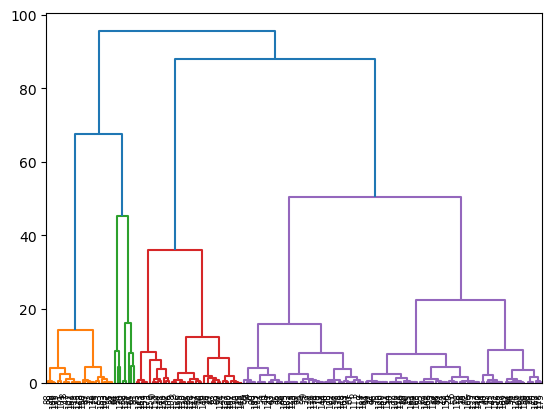

In [59]:
# Determine the number of clusters
# Option A: dendogram
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
dissimilarity_matrix = squareform(pdist(data.iloc[:,34:], metric='euclidean'))

# perform hierarchical clustering using Ward's method on this matrix
hc = linkage(dissimilarity_matrix, method="ward")

# plot the resulting dendrogram
dendrogram(hc, leaf_font_size=6)
plt.show()

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       184 non-null    int64  
 1   use_platforms            184 non-null    object 
 2   platforms_used           184 non-null    object 
 3   frequency                184 non-null    object 
 4   age                      184 non-null    object 
 5   gender                   184 non-null    object 
 6   employed                 184 non-null    object 
 7   wise_move                184 non-null    int64  
 8   good_thing               184 non-null    int64  
 9   makes_sense              184 non-null    int64  
 10  better_buy_sell          184 non-null    int64  
 11  future_expectation       184 non-null    int64  
 12  future_engagement        184 non-null    int64  
 13  likely_participation     184 non-null    int64  
 14  saves_resources          1

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

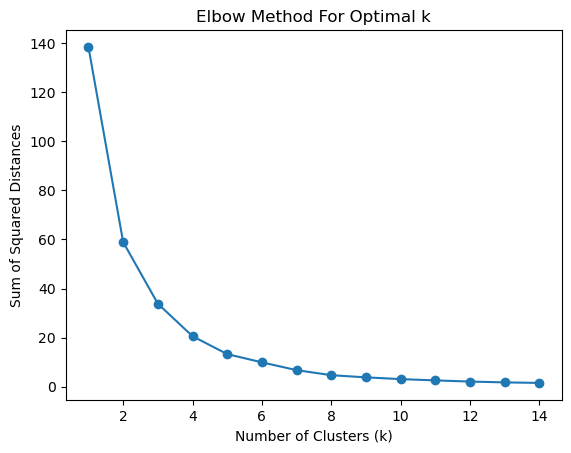

In [60]:
# Option B: The Elbow
from sklearn.cluster import KMeans

# Calculate the sum of squared distances for different values of k
sum_of_squared_distances = []
K_range = range(1, 15)  # You can adjust this range based on your problem
for k in K_range:
    kmeans = KMeans(n_clusters=k, n_init='auto')
    kmeans.fit(data.iloc[:,34:])
    sum_of_squared_distances.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(K_range, sum_of_squared_distances, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.show()

In [82]:
# Step 2: Calculate the final cluster solution
kmeans = KMeans(n_clusters=3, random_state=11, n_init='auto')

# Add a new column with cluster assignment for each person
data['Cluster'] = kmeans.fit_predict(data.iloc[:,31:])
data



C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,ID,use_platforms,platforms_used,frequency,age,gender,employed,wise_move,good_thing,makes_sense,...,prestige_contributors,save_money,financial_benefit,economic_improvement,saves_time,Anti-Practical,Anti-Social_enjoyment,Eco-friendly,Anti-budget_friendly,Cluster
0,1,no,cloud services,several times a week,36-45,M,employed,5,5,4,...,2,2,6,3,3,-0.019884,-0.698266,0.450857,1.420247,0
1,2,yes,"bike-sharing, couud services, house-sharing",several times a week,36-45,F,employed,6,6,6,...,2,6,6,5,5,0.028082,1.623759,0.349209,0.164927,2
2,3,yes,"bike-sharing, couud services",several times a week,over 60,F,employed,7,7,5,...,4,7,7,5,2,-0.905154,0.728478,-0.504136,0.486597,0
3,4,yes,house-sharing/renting,several times a week,46-60,M,employed,7,4,5,...,6,2,6,6,6,-0.167523,-0.531065,-0.707709,0.697259,0
4,5,no,house-sharing/renting,tried once or twice,36-45,F,employed,4,5,5,...,1,5,4,4,5,0.611044,-0.256697,0.207123,0.018974,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,180,no,none of the above,tried once or twice,26-35,M,entrepreneur,3,6,2,...,5,5,5,3,5,0.494286,-1.497456,-0.056196,-0.820841,0
180,181,no,none of the above,tried once or twice,46-60,F,employed,4,5,4,...,4,5,4,5,5,-0.218051,-1.356990,0.229934,-0.254151,0
181,182,yes,cloud services,several times a month,36-45,F,employed,5,6,5,...,4,5,5,5,6,-0.509306,-0.103194,0.192717,0.499670,0
182,183,no,bike-sharing,once a year,18-25,M,employed,3,4,3,...,6,3,4,5,5,0.508466,-1.089291,0.619302,0.326901,0


In [84]:
data.columns[31:-1]

Index(['Anti-Practical', 'Anti-Social_enjoyment', 'Eco-friendly',
       'Anti-budget_friendly'],
      dtype='object')

In [85]:
print("Cluster Centers:")
pd.DataFrame(kmeans.cluster_centers_, columns=data.columns[31:-1], \
             index=['Cluster 0', 'Cluster 1', 'Cluster 2'])

Cluster Centers:


,Anti-Practical,Anti-Social_enjoyment,Eco-friendly,Anti-budget_friendly
Cluster 0,-0.509935,-0.704983,0.011535,0.047813
Cluster 1,0.705963,0.326735,-0.785472,-0.135820
Cluster 2,-0.003283,0.814087,0.970316,0.088098


In [86]:
print(kmeans.cluster_centers_.shape)
print(data.columns[31:35].shape)

(3, 4)
(4,)


1   use_platforms            184 non-null    object 
 2   platforms_used           184 non-null    object 
 3   frequency                184 non-null    object 
 4   age                      184 non-null    object 
 5   gender                   184 non-null    object 
 6   employed

In [96]:
# Convert "temporarily unemployed" to "unemployed"
data['employed'] = data['employed'].replace({'temporarily unemployed': 'unemployed'})

# Convert "self-employed" and "entrepreneur" to "employed"
data['employed'] = data['employed'].replace({'self-employed': 'employed', 'entrepreneur': 'employed'})

In [97]:
data["employed"].value_counts()

employed             137
full-time student     37
unemployed            10
Name: employed, dtype: int64

In [98]:
xtab(data['Cluster'], data['employed'])

Chi-squared value: 1.684481602165971
P-value: 0.7935345936085083


employed            employed full-time student unemployed
Cluster                                                  
0       Observed          62                14          4
        Expected       59.57             16.09       4.35
        Chi squared      0.1              0.27       0.03
1       Observed          44                11          3
        Expected       43.18             11.66       3.15
        Chi squared     0.02              0.04       0.01
2       Observed          31                12          3
        Expected       34.25              9.25        2.5
        Chi squared     0.31              0.82        0.1

In [88]:
data["use_platforms"].value_counts()

yes           131
no             46
don't know      7
Name: use_platforms, dtype: int64

In [89]:
data["platforms_used"].value_counts()

cloud services                                           51
none of the above                                        43
car-sharing, cloud services                              16
house-sharing/renting                                    15
car-sharing                                              12
car-sharing, cloud services, house-sharing               10
car-sharing, house-sharing                                8
bike-sharing, couud services, house-sharing               4
car-sharing, bile-sharing                                 3
bike-sharing, couud services                              3
car-sharing, coworking, house-sharing                     3
bike-sharing                                              3
coworking, house-sharing                                  2
car-sharing, bike-sharing, cloud services                 1
car-sharing, coworking, house-sharing, cloud services     1
I use some, but I can't say which ones                    1
car-sharing, coworking, coliving, house-

In [90]:
data["gender"].value_counts()

F    114
M     70
Name: gender, dtype: int64

In [93]:
data["age"].value_counts()

18-25      99
26-35      33
36-45      27
46-60      19
over 60     6
Name: age, dtype: int64

CROSS-TAB ANALYSIS

In [94]:
import pandas as pd
from scipy.stats import chi2_contingency
def xtab(d1, d2):
    crosstab = pd.crosstab(index=d1, columns=d2)    
    chi2, p, _, expected = chi2_contingency(crosstab)
    contributions = (crosstab - expected) ** 2 / expected
    
    # Create a multi-index DataFrame
    index = pd.MultiIndex.from_product([crosstab.index, ['Observed', 'Expected', 'Chi squared']])
    columns = pd.MultiIndex.from_product([crosstab.columns])

    df = pd.DataFrame(index=index, columns=columns)

    # Fill in the DataFrame
    df.loc[crosstab.index, 'Observed', :] = crosstab.values
    df.loc[crosstab.index, 'Expected', :] = expected.round(2)
    df.loc[crosstab.index, 'Chi squared', :] = contributions.values.round(2)

    print(f"Chi-squared value: {chi2}")
    print(f"P-value: {p}")
    return(df)

In [95]:
xtab(data['Cluster'], data['gender'])

Chi-squared value: 4.020617059891106
P-value: 0.13394734152688856


gender                   F      M
Cluster                          
0       Observed        52     28
        Expected     49.57  30.43
        Chi squared   0.12   0.19
1       Observed        30     28
        Expected     35.93  22.07
        Chi squared   0.98    1.6
2       Observed        32     14
        Expected      28.5   17.5
        Chi squared   0.43    0.7